In [2]:
# import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
# read in data
original = pd.read_csv('original_data_predictions.csv')
new = pd.read_csv('climate_results.csv')

In [4]:
original.head(3)

,actual_temp,day,month,predicted_temp,year
0,3.034,1.0,1.0,1.527702,1750.0
1,3.083,1.0,2.0,1.972995,1750.0
2,5.626,1.0,3.0,4.733904,1750.0


In [5]:
new.head(3)

,landavgtemp,month,year
0,3.514622,1.0,2016.0
1,4.055345,2.0,2016.0
2,6.168799,3.0,2016.0


In [6]:
original = original.drop('day',1)

In [7]:
new.rename(columns={'landavgtemp': 'predicted_temp'}, inplace=True)

In [8]:
new['actual_temp'] = np.nan

In [9]:
new.head()

,predicted_temp,month,year,actual_temp
0,3.514622,1.0,2016.0,NaN
1,4.055345,2.0,2016.0,NaN
2,6.168799,3.0,2016.0,NaN
3,9.463200,4.0,2016.0,NaN
4,12.422633,5.0,2016.0,NaN


In [10]:
complete = original.append(new, ignore_index=True)
complete

,actual_temp,month,predicted_temp,year
0,3.034,1.0,1.527702,1750.0
1,3.083,2.0,1.972995,1750.0
2,5.626,3.0,4.733904,1750.0
3,8.490,4.0,8.560140,1750.0
4,11.573,5.0,12.015585,1750.0
5,12.937,6.0,14.209926,1750.0
6,15.868,7.0,14.877536,1750.0
7,14.750,8.0,14.323442,1750.0
8,11.413,9.0,11.347094,1750.0
9,6.367,10.0,7.427641,1750.0


In [11]:
grouped = complete.groupby('year').mean()
grouped.head(3)

,actual_temp,month,predicted_temp
year,,,
1750.0,8.719364,6.090909,8.531585
1751.0,7.976143,4.714286,8.181594
1752.0,5.779833,6.833333,5.378029


In [12]:
grouped = grouped.drop('month',1)

In [13]:
grouped.reset_index(level=0, inplace=True)

In [14]:
grouped.head(3)

,year,actual_temp,predicted_temp
0,1750.0,8.719364,8.531585
1,1751.0,7.976143,8.181594
2,1752.0,5.779833,5.378029


In [15]:
grouped.rename(columns={'actual_temp': 'Yearly Average Actual Temperature','predicted_temp':'Yearly Average Predicted Temperature'}, inplace=True)

In [16]:
grouped

,year,Yearly Average Actual Temperature,Yearly Average Predicted Temperature
0,1750.0,8.719364,8.531585
1,1751.0,7.976143,8.181594
2,1752.0,5.779833,5.378029
3,1753.0,8.388083,8.397631
4,1754.0,8.469333,8.453283
5,1755.0,8.355583,8.402144
6,1756.0,8.849583,8.879887
7,1757.0,9.022000,8.615583
8,1758.0,6.743583,7.563559
9,1759.0,7.985083,7.662195


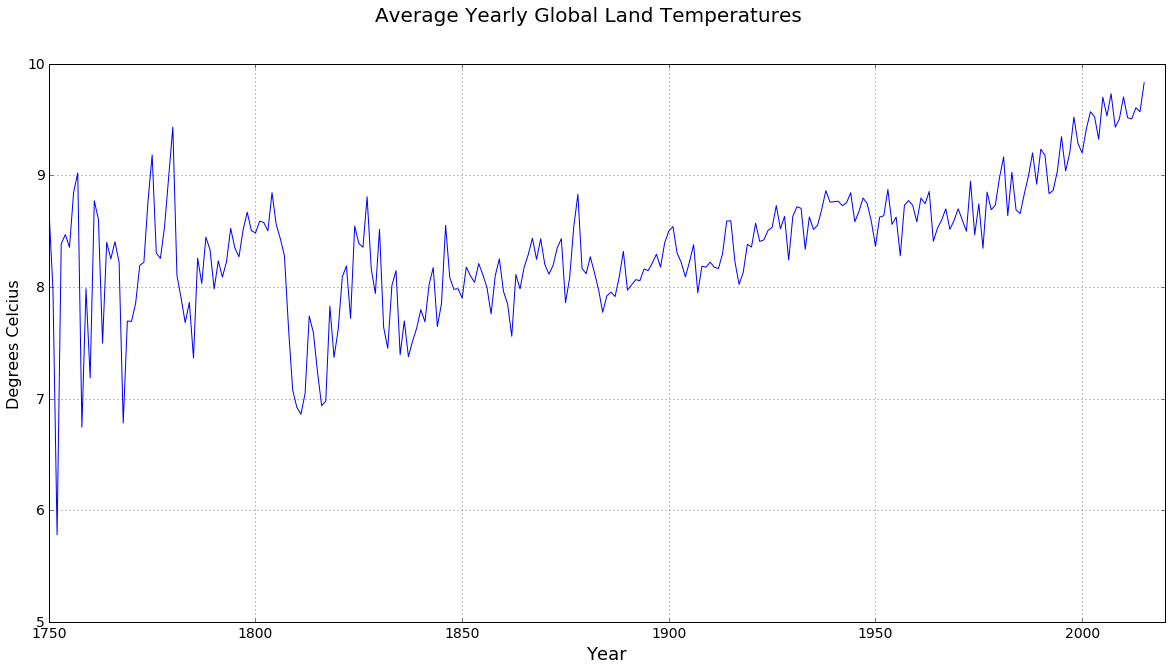

In [18]:
fig = plt.figure()
ax = grouped.plot('year','Yearly Average Actual Temperature',figsize=(20,10),grid=True,ylim=(5,10),fontsize=14,legend=False)
plt.suptitle('Average Yearly Global Land Temperatures', fontsize=20)
plt.xlabel('Year', fontsize=18)
plt.ylabel('Degrees Celcius', fontsize=16)

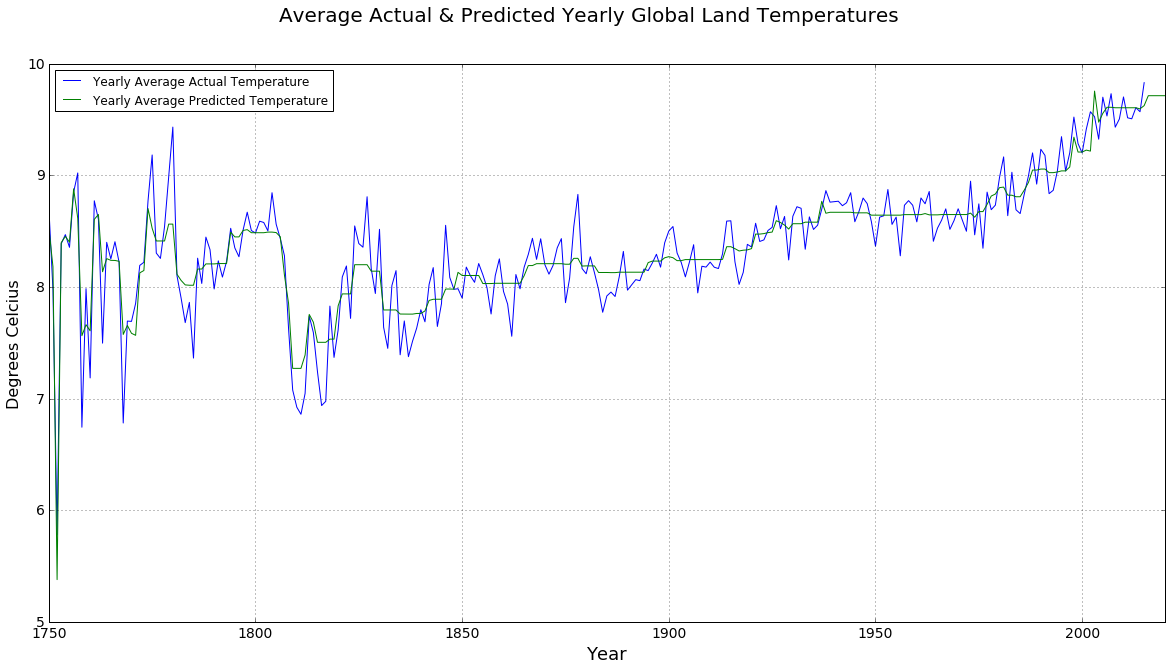

In [20]:
fig = plt.figure()
ax = grouped.plot('year',['Yearly Average Actual Temperature','Yearly Average Predicted Temperature'],figsize=(20,10),grid=True,ylim=(5,10),fontsize=14,legend=True)
plt.suptitle('Average Actual & Predicted Yearly Global Land Temperatures', fontsize=20)
plt.xlabel('Year', fontsize=18)
plt.ylabel('Degrees Celcius', fontsize=16)